# 1. Data Processing

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("shootings.csv")

In [12]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [13]:
df.shape

(4895, 15)

In [14]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [16]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

# 2. Feature Selection 

In [30]:
# Splitting dataset in features and target variable
feature_cols = ['armed', 'age', 'gender','race','threat_level', 'flee', 'signs_of_mental_illness', 'arms_category']
X = df[feature_cols]               # Features of dataset
y = df['manner_of_death']          # Target variable 

print(X,y)

           armed   age gender      race threat_level         flee  \
0            gun  53.0      M     Asian       attack  Not fleeing   
1            gun  47.0      M     White       attack  Not fleeing   
2        unarmed  23.0      M  Hispanic        other  Not fleeing   
3     toy weapon  32.0      M     White       attack  Not fleeing   
4       nail gun  39.0      M  Hispanic       attack  Not fleeing   
...          ...   ...    ...       ...          ...          ...   
4890       Taser  27.0      M     Black       attack         Foot   
4891         gun  23.0      M     Black       attack          Car   
4892     unarmed  25.0      F     White        other  Not fleeing   
4893         gun  22.0      M     White        other        Other   
4894         gun  31.0      M     White       attack          Car   

      signs_of_mental_illness          arms_category  
0                        True                   Guns  
1                       False                   Guns  
2     

# Splitting Data

In [28]:
from sklearn.model_selection import train_test_split  # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4895, 7), (4895,), (3426, 7), (1469, 7), (3426,), (1469,))

# Random Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Model
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    X.iloc[:, X.columns.get_loc(col)] = label_encoders[col].fit_transform(X[col])

In [39]:
from sklearn import metrics

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

In [42]:
# Evaluate model performance
# Model Accuracy, how often is the classifier correct?

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9254341164453525
Accuracy: 0.93


In [43]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
                  precision    recall  f1-score   support

            shot       0.94      0.98      0.96       920
shot and Tasered       0.11      0.03      0.05        59

        accuracy                           0.93       979
       macro avg       0.53      0.51      0.51       979
    weighted avg       0.89      0.93      0.91       979



In [59]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5, shuffle=True, random_state=42) #k-fold cross-validation
scores = cross_val_score(random_forest_model, X, y, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.92236977 0.93667007 0.94279877 0.93769152 0.93973442]
Mean Accuracy: 0.9358529111338101


In [63]:
# Detailed report for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold} Accuracy: {score}")

Fold 1 Accuracy: 0.9223697650663942
Fold 2 Accuracy: 0.9366700715015321
Fold 3 Accuracy: 0.9427987742594485
Fold 4 Accuracy: 0.9376915219611849
Fold 5 Accuracy: 0.9397344228804902


# Support Vector Machine

In [54]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)      # Model performance
print(f"SVM Accuracy: {accuracy_svm:.2f}")
      
print("SVM Classification Report:")  # Classification Report
print(classification_report(y_test, y_pred, zero_division=1))

SVM Accuracy: 0.94
SVM Classification Report:
                  precision    recall  f1-score   support

            shot       0.94      0.98      0.96       920
shot and Tasered       0.11      0.03      0.05        59

        accuracy                           0.93       979
       macro avg       0.53      0.51      0.51       979
    weighted avg       0.89      0.93      0.91       979



In [67]:
import numpy as np

num_folds = 5 
kf = KFold(n_splits=5, shuffle=True, random_state=42) #k-fold cross-validation

cv_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.93973442 0.94994893 0.95914198 0.95199183 0.94586313]
Mean Accuracy: 0.9493360572012257


# Visualisations 

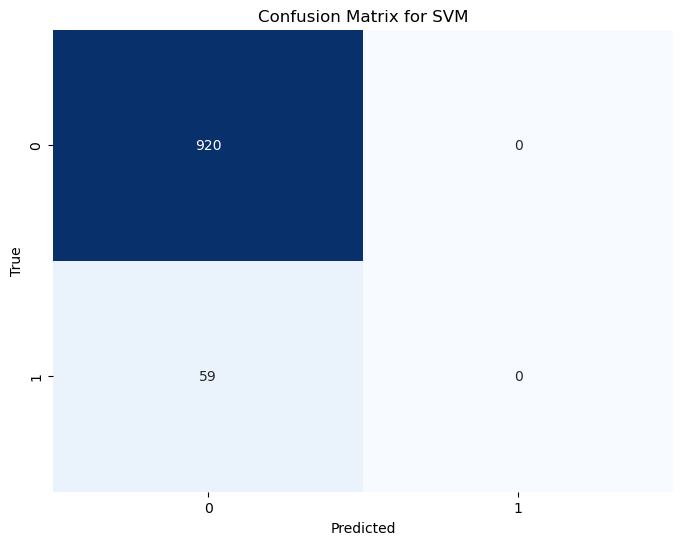

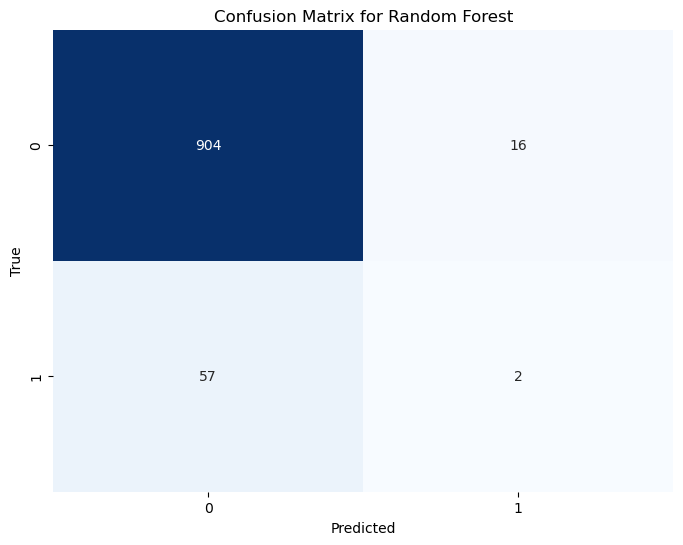

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model, model_name):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

svm_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_model, "SVM")

# Plot confusion matrix for Random Forest
plot_confusion_matrix(random_forest_model, "Random Forest")
